# Lab 5

With k-means, we have started to explore _unsupervised learning_ by clustering the data into $k$ clusters. Today we will explore using **dimension reduction** to summarize our data. Today goals are:

0. Define "data dimension" and why we might need to reduce the dimension of our data
1. View data in three dimensions
2. Explore _Principal Component Analysis_ 

In [1]:
# Import block 
# (What else is missing?)

%matplotlib notebook 
# Note the difference here!

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d # <-- New line
import matplotlib.pyplot as plt

#### Data for this Lab

For this lab, we will again using the (fake) student dataset. From this data, construct `justnum`, a numpy array of only the numerical variables from `students`. 

In [2]:
# Importing the students information 
students = pd.read_csv("../Lab03/students_info.csv")

In [3]:
# Selecting only the numerical variables AND convert to a numpy array
justnum = students[["coffee", "sleep", "gym", "gpa"]].to_numpy()

## Dimension of Data

The goal of **dimension reduction** is simply to reduce the dimension of your data. So what is the dimension of data?

Recall the shape of our data:

<table>
<thead>
<tr>
<th></th>
<th>Variable 0</th>
<th>Variable 1</th>
<th>Variable 2</th>
<th>Variable 3</th>
<th>Variable 4</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Observation 0</strong></td>
<td>Var 0 of Obs 0</td>
<td>Var 1 of Obs 0</td>
<td>Var 2 of Obs 0</td>
<td>Var 3 of Obs 0</td>
<td>Var 4 of Obs 0</td>
</tr>
<tr>
<td><strong>Observation 1</strong></td>
<td>Var 0 of Obs 1</td>
<td>Var 1 of Obs 1</td>
<td>Var 2 of Obs 1</td>
<td>Var 3 of Obs 1</td>
<td>Var 4 of Obs 1</td>
</tr>
<tr>
<td><strong>Observation 2</strong></td>
<td>Var 0 of Obs 2</td>
<td>Var 1 of Obs 2</td>
<td>Var 2 of Obs 2</td>
<td>Var 3 of Obs 2</td>
<td>Var 4 of Obs 2</td>
</tr>
<tr>
<td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
</tr>
</tbody>
</table>

We say that the **dimension** of the data is the number of _variables_ per observations.    

In most circumstances, a reduction of dimension is necessary. There are several reasons that make dimension reduction necessary and desired: 
1. Purposes of visualization
2. The "Curse of Dimensionality"

Before proceeding too much further, let us take a look at **how** to make _interactive_ 3D plots in `matplotlib` within the jupyter ecosystem. 

## 3D data visualization in `matplotlib`

#### Lines before `matplotlib` import
During the last few labs, we have had an extra line in our import block. This sets the _options_ for how we use `matplotlib` within jupyter:
 - So far, we have only used `inline` which allowed plots to be within our notebooks.
 - Today we will use `notebook` which will allow for **zoomable** plots.    
 
To learn more about the options for `matplotlib`, read [this post](https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1). Be sure that whatever option you chose, it should happen _before_ importing `matplotlib`. 

### Creating a three dimensional scatter plot 

To project in three dimensions, we need to employ `mpl_toolkits` to give us this ability. Following the examples [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html), we begin by setting the figure and the projection of that figure. 

After creating the figure and the projection, we can then use `.scatter` with three data arguments, instead of just two. 

<IPython.core.display.Javascript object>


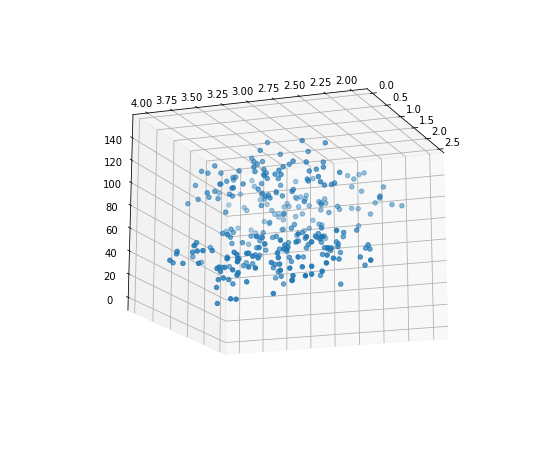

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the SCATTER() plot 
ax.scatter(num4[:,0], num4[:,3], num4[:,2]);

### Interaction 

Notice that some additional framing has popped up around the plot. These are the interactive pieces. Let's experiment with a few of them: 

* **Resizing the plot** - Notice the small triangle or just as two parallel lines. Click on this and drag it to create a bigger (or smaller) plot. 
* **Changing the view** - We can change how the plot is arranged. To do so, click on a piece of the grey plot and then move the plot around. 
* **Stopping the interaction** - Only one plot can interactive at a time, so you need to click the power button to stop the interactive piece. 

What happened after you clicked the power button? 

(Markdown block for you to add what a few notes about what you notice)





#### Adding color
We can also add color to our plots just as before using the `c` and `cmap` flags. Add color to our plot using the "Greens" colormap: 

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the SCATTER() plot with colors
ax.scatter(num4[:,0], num4[:,3], num4[:,2], ????);

#### Adding Axes using `plot()`

While you can use `plot()` to plot a line in three dimensions, in this notebook, we will use it to create axes. 

First, we will use `linspace` and `zeros` to create numpy arrays which will then become the axes: 

In [40]:
# Creating the first axis
x_min = min(np.min(num4[:,0]),-1)
x_max = np.max(num4[:,0])
x_axis = np.linspace(x_min,x_max, 1000)

# Creating the second axis
y_min = min(np.min(num4[:,3]),-1)
y_max = np.max(num4[:,3])
y_axis = np.linspace(y_min,y_max, 1000)

# Creating the third axis
z_min = min(np.min(num4[:,2]),-1)
z_max = np.max(num4[:,2])
z_axis = np.linspace(z_min,z_max, 1000)

# Create a vector of zeros to be the same length as the axes
axis_0 = np.zeros(1000)


In [42]:
# Check out what you have created in this code block




#### Using `plot()` for 3D
Using the numpy arrays, first create plot layers with the axes and then add your points on top. 

Notice that just as with `scatter`, to create a 3D line with `plot`, we can three data arguments once we have set the projection view. 

Once you have created your plot, re-orient the plot so that the data faces towards you with the axes are behind and below the data. 

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create each axis individually and 
#    use the color flag make sure each one is black
ax.plot(x_axis, axis_0, axis_0, c="k")
ax.plot(axis_0, y_axis, axis_0, c=???)
ax.plot(axis_0, axis_0, z_axis, c=???)

# Create the SCATTER() plot with colors
ax.scatter(num4[:,0], num4[:,3], num4[:,2]);

SyntaxError: invalid syntax (<ipython-input-45-1738e942ef9e>, line 7)

### Dimension reduction for Visualizations

Even with the best 3D plotting skills, it can be more than a challenge to view three-dimensional data on a screen (that is a two-dimensional object). Which leads us to a question: **What is the best flat (or 2D) representation of data?**

There are a few ways to answer this question. The first option is to create all possible 2D visualizations made of all combinations of two variables. The second option is to create all possible 3D visualizations and simply swirl the visualizations until you find an acceptable 2D view. Both of these options are exhausting. 

Visualization is not the only reason to lower the dimension. There is another technical reason, as we discuss below. 


### The "Curse of Dimensionality" 

With very high dimensional data, we may have data that becomes very spread out and starts to look as though each point is equally spread from every other point. In these cases it becomes necessary to reduce the dimensionality of the data such that we gain back definition between what is "near" and "far" in terms of distances between data points. 

## Dimension Reduction via PCA

There are many ways to reduce the dimension. As absurd as the option of finding acceptable 2D view of a 3D plot sounds, this is the goal of _Principal Component Analysis_ but done in a more routine manner. Our ultimate goal is to create a transformation for our data into a lower dimensional space. We can think of this as:

$ \textrm{Data Matrix} \Rightarrow_{\textrm{transform}} \textrm{Lower Dimension}$

### A First Example

Before we begin with details of PCA, let's consider an example on `justtwo` made of the `gym` and `coffee` variables. 

In [5]:
justtwo = students[['gym','coffee']].to_numpy()

In PCA, we are looking for the best view of the data. The "best view" can be considered to be the directions of greatest spread. In this simple example, we are looking for how to lay down a set of axes where each stretches in the directions of most spread:

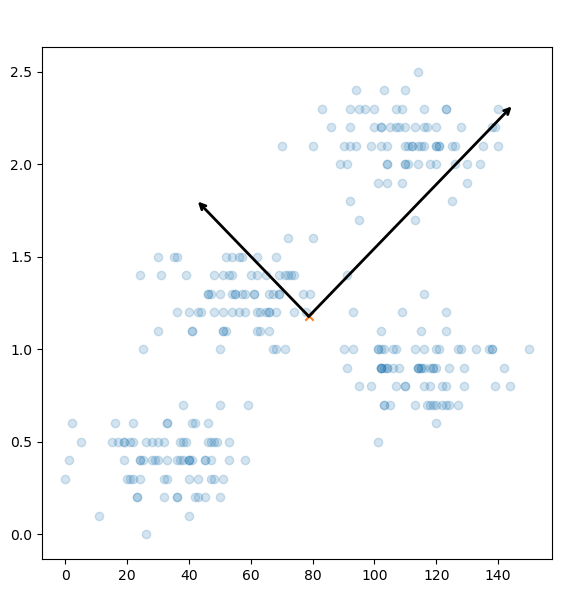

What these axes tell us is how to tilt this two dimensional data such that the greatest spread is now on the x-axis and the second greatest spread is on the y-axis. The above plot was created by referring to a plot with from [here](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html). 

### A Second Example

In addition to altering the view of data, we can also reduce the dimension of our data to just one dimension. In other words, if we were to find the best one-dimensional representation for our data, what would it be and what it would look like? 


This plot shows how our two-dimensional data would project best into a one-dimensional space: 

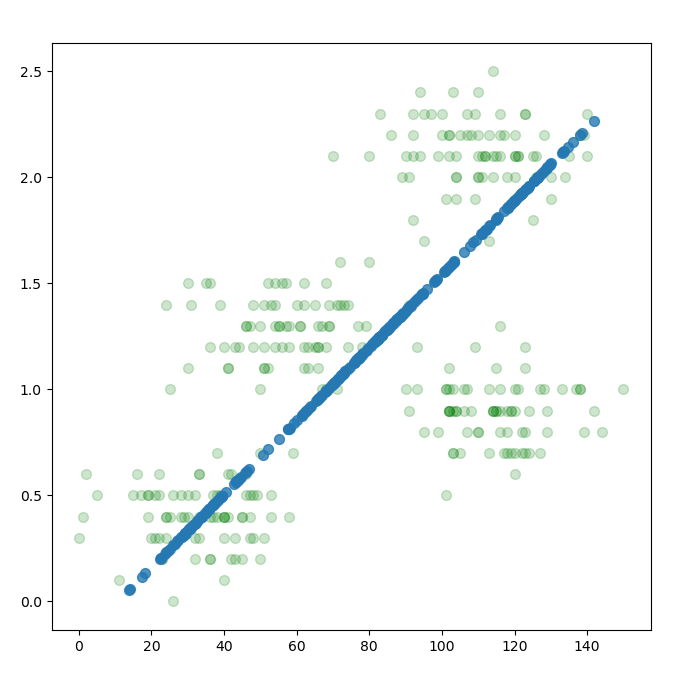

## Details of PCA

This discussion is a less precise and technical one than either of these: [1](https://plot.ly/ipython-notebooks/principal-component-analysis/) and [2](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html). The goal of this section is to provide a general understanding of how and why PCA works. 

### Step 0 - Standardizing the Data

Heuristically, PCA is looking for the directions of greatest spread of our data. This means that the scale of the data will impact each other. 

In a previous lab, we discussed that there are two commonly used ways to scale variables: [normalizing and standardizing](https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc). For this lab, we will _standardize_ all our variables which will center each variable at 0 with a standard deviation equal to 1. 

To _standardize_ variables, we need to find the mean and standard deviation (denoted _std_ ) for each one. Then we use them as follows:

$Var_{standard} = \dfrac{Var - Var_{mean}}{Var_{std}}$

Instead of looping over all the rows for each variable, we can do this computation as a `for` loop over the columns. 

In [6]:
mean_vec = np.mean(justtwo, axis=0)
sd_vec = np.std(justtwo, axis=0)

justtwo_norm = justtwo.copy()

for i in range(justtwo.shape[1]):
    justtwo_norm[:,i] = (justtwo[:,i] - mean_vec[i]*np.ones(justtwo_norm.shape[0]))/sd_vec[i]

The array `justtwo_norm` is each of the variables contained in `justtwo` standardized, but in the same place. Notice the use of `axis=0` for both the mean and standard deviation computations. 

Before moving on, check that only the data's scale has been changed (and nothing else). 

In [ ]:
# Check the new data array - 




At the end of step 0, we have data that is scaled such that each one is centered at 0 and standard deviation is 1. This means that the "typical variation of the datapoints is 1 unit from center". In other words, a lot -- but not all -- of our _standardized_ data is within 1(ish) unit of 0. 


**Note** - By standardizing the data to have the same spread, we are saying that each variable is as important as every other variable. If this is not the case for your data, you should still center your data about 0, but not necessarily set the standard deviation to 1. 

### Step 1 - Covariance 
If PCA is looking for the best view that shows off the directions of greatest spread, then we begin by examining which variables have similar shape and direction. In other words, we would like to understand the _covariance_ of every possible pairing our variables:
* If two variables tend in the same (or exact opposite) direction, then their covariance will be close to 1. 
* If two variables move in completely tangential (ie. completely different) directions, then their covariance will be close to 0. 

We can create a matrix of every possible pair of variables and create a covariance matrix: 

<table>
<thead>
<tr>
<th></th>
<th>Variable 0</th>
<th>Variable 1</th>
<th>Variable 2</th>
<th>...</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Variable 0</strong></td>
<td>Covariance of Var 0 and Var 0</td>
<td>Covariance of Var 0 and Var 1</td>
<td>Covariance of Var 0 and Var 2</td>
<td>...</td>
</tr>
<tr>
<td><strong>Variable 1</strong></td>
<td>Covariance of Var 1 and Var 0</td>
<td>Covariance of Var 1 and Var 1</td>
<td>Covariance of Var 1 and Var 2</td>
<td>...</td>
</tr>
<tr>
<td><strong>Variable 2</strong></td>
<td>Covariance of Var 2 and Var 0</td>
<td>Covariance of Var 2 and Var 1</td>
<td>Covariance of Var 2 and Var 2</td>
<td>...</td>
</tr>
<tr>
<td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
    <td>...</td>
</tr>
</tbody>
</table>


If we are comparing the variables to each other pairwise, what size do you think the resulting matrix should be? 

Using `cov` within the numpy package, we can compute the pairwise covariance of objects. Test the next line of code. Is this what you expect? 



In [12]:
cov_mat = np.cov(justtwo_norm)

Note that in this computation, we want to compare the information within one whole variable to the information in another whole variable. So for this computation, the objects of interest are teh variables and not the observations. Since `numpy` treats rows as the objects of interest, we need to 'flip' our dataset -- temporarily -- so that it is arranged with the variables along the rows and the observations are the columns. To do this this momentary flip, we use the _transpose_ operator `.T`. 

Does the below give you the shape that you expect? 

In [16]:
cov_mat = np.cov(justtwo_norm.T)
cov_mat

array([[1.00334448, 0.54154656],
       [0.54154656, 1.00334448]])

After Step 1, we have a covariance matrix between our variables. This matrix is telling us how much our variables tend in the same direction. 

### Repositioning the View

Now that we know how pairs of our variables tend, the next step is to determine 

### Choosing the right number of variables


### Stepping back to "original" view

#### References consulted
0. _Doing Data Science: Straight talk from the frontline_ by C. O'Neil & R. Schutt (2014)
1. _Python Machine Learning_
2. [Three-Dimensional Plotting in Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)
3. [mplt3d tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
4. [Using matplotlib in jupyter notebooks — comparing methods and some tips](https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1)
5. [linspace helpfile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
6. [Principal Component Analysis in Python](https://plot.ly/ipython-notebooks/principal-component-analysis/)
7. [In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)
8. [Answer 1 to Question - Not normalizing data before PCA gives better explained variance ratio](https://stats.stackexchange.com/questions/105592/not-normalizing-data-before-pca-gives-better-explained-variance-ratio)
9. [A Beginner's Guide to Eigenvectors, Eigenvalues, PCA, Covariance and Entropy](https://skymind.ai/wiki/eigenvector)